# Task 1 – Image classification on the MNIST handwritten digits recognition dataset 

Task 1a. You are asked to train 2 different models:
1. Model A) Recurring only the fully connected (i.e. dense) layers.
2. Model B) A convolutional neural network for handwritten recognition. Appropriately
discuss the architecture and the hyperparameters chosen. 

In [6]:
from keras.datasets import mnist
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [7]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


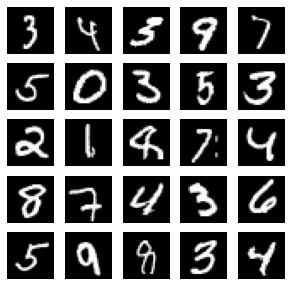

In [9]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]
input_size = image_size * image_size
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
batch_size = 128
hidden_units = 256
dropout = 0.45

#### Model A) Recurring only the fully connected (i.e. dense) layers.

In [14]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [16]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4238 - accuracy: 0.8718
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1945 - accuracy: 0.9425
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1524 - accuracy: 0.9546
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1302 - accuracy: 0.9597
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1148 - accuracy: 0.9655
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1036 - accuracy: 0.9682
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0949 - accuracy: 0.9705
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - accuracy: 0.9722
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0813 - accuracy: 0.9737
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0772 - accuracy: 

#### Model B) A convolutional neural network for handwritten recognition. Appropriately discuss the architecture and the hyperparameters chosen.

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

In [19]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Flatten())
model_1.add(Dense(256, activation = "relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation = "softmax"))
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
def evaluate_model(x_train, y_train, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(x_train):
		# select rows for train and test
		trainX, trainY, testX, testY = x_train[train_ix], y_train[train_ix], x_train[test_ix], y_train[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories


In [34]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [35]:
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

###Task 1b. Please demonstrate that you monitored the training of the neural network by monitoring appropriately the loss-function, the accuracy, and confusion matrix. Demonstrate the performance of the models relying on appropriate graphs and discuss the differences between FC and CNN classifier

> 98.733
> 99.817
> 99.992
> 100.000
> 100.000


<ipython-input-34-7342808bb48a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-34-7342808bb48a>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)


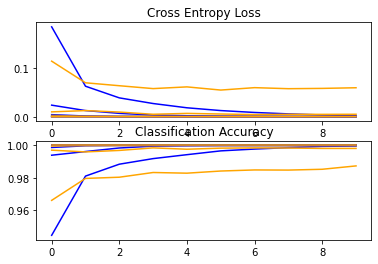

Accuracy: mean=99.708 std=0.492, n=5


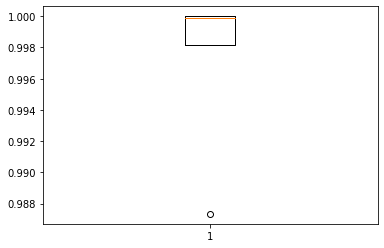

In [36]:
scores, histories = evaluate_model(x_train, y_train)
summarize_diagnostics(histories)
summarize_performance(scores)


### Task 1c. 1). Apply a pre-trained network (Alexnet, VGG, ResNet, etc.) to the network and select one layer to visualize the activation of the learned feature map. 2) Design a state-of-the-art classifier based on the MNIST dataset that will be able to beat LeNet 1998 model (98.7% accuracy on the test set). Demonstrate that your model does not overfit the data.

In [37]:
import tensorflow as tf 
import numpy as np 

(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)
x_train = np.repeat(x_train, 3, axis=-1)
x_train = x_train.astype('float32') / 255
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
print(x_train.shape, y_train.shape)

(60000, 32, 32, 3) (60000, 10)


In [38]:
input = tf.keras.Input(shape=(32,32,3))
efnet = tf.keras.applications.ResNet50(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = input)
gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)
output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)
transfer_model = tf.keras.Model(efnet.input, output)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
transfer_model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = tf.keras.metrics.CategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())
transfer_model.fit(x_train, y_train, batch_size=128, epochs=5, verbose = 2)

Epoch 1/5


#### Lenet model modification

In [ ]:
# building the model
lenet_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, padding="same", input_shape=[28,28,1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(84),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
lenet_5.summary()

In [ ]:
lenet_5.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                metrics=["accuracy"])

In [ ]:
history = lenet_5.fit(x_train, y_train, epochs=30, batch_size=1024)

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

ax1.plot(history.history['loss'], label="Train loss")
ax1.plot(history.history['val_loss'], label="Validation loss")
ax2.plot(history.history['accuracy'], label="Train accuracy")
ax2.plot(history.history['val_accuracy'], label="Validation accuracy")

ax1.legend(fontsize=15);
ax2.legend(fontsize=15);

ax1.set_title('Loss per epoch', fontsize=25);
ax1.set_xlabel("epoch", fontsize=20);
ax2.set_title('Accuracy per epoch', fontsize=25);
ax2.set_xlabel("epoch", fontsize=20);

ax1.grid(True)
ax2.grid(True)